# **Exponential Quantum Speedup in Simulating Coupled Classical Oscillators using Classiq Synthesizer**

The project presents a quantum algorithm capable of simulating the classical dynamics of $2^n$ coupled oscillators providing an exponential speedup to the classical approaches. This project has been inspired from the original work (https://journals.aps.org/prx/pdf/10.1103/PhysRevX.13.041041), presented in 2023 by Ryan Babbush et al.

The project was done for Classiq Challenge as a part of Quantum Research & Industry Skills Exchange (QRISE) - 2024 Hackathon. The team members

*   Aman Gupta
*   Hirmay Sandesara
*   Ramachandran Sekanipuram Sekanipuram

We would like to thank the QRISE and classiq for their support and mentorship. Our presentation is available online through the link - (https://youtu.be/9wHo1hxuORQ)



**Outline**


1.   Section 1 - Introduction to the problem
2.   Section 2 - Classical dynamics
    *   Section 2.1 - Derivation of equations of 2 mass coupled system
    *   Section 2.2 - Simulation of the above equations.
    *   Section 2.3 - Plotting the position and velocity graphs of each masses.
    *   Section 2.4 - Generic template for simulation of n number of 1D cases.
    *   Section 2.5 - Plotting the position and velocity of generic template.
    *   Section 2.6 - Time complexity analysis.
3.    Section 3 - Quantum simulation for 4 mass
system [State vector methods]
    *   Section 3.1 - Initial state preparation.
    *   Section 3.2 - Hamiltonian formulation.
    *   Section 3.3 - State vector simulation.
    *   Section 3.4 - Suzuki Trotterization.
    *   Section 3.5 - Evolution for 50 seconds.
    *   Section 3.6 - Time complexity analysis.
4.    Section 4 - Quantum Evoluation methods
    *   Section 4.1 - Suzuki trotterization for 50 seconds.
    *   Section 4.2 - Exponentiation methods for 50 seconds.
    *   Section 4.3 - QDrift method for 50 seconds.
    *   Section 4.4 - Comparison of various methods.
5.    Section 5 - Quantum simulation for 4 mass system [Probability measure]
    *   Section 5.1 - Initial state preparation.
    *   Section 5.2 - Hamiltonian formulation.
    *   Section 5.3 - Probability measure.
    *   Section 5.4 - Suzuki Trotterization.
    *   Section 5.5 - Evolution for 50 seconds using tomography.
    *   Section 5.6 - Evolution for 50 seconds using [our approach]
    *   Section 5.7 - Time complexity analysis.
    *   Section 5.8 - Exponentiation methods for 50 seconds using tomography,our approach.
    *   Section 5.9 - QDrift method for 50 seconds using tomography,our approach.
    *   Sectiion 5.10 - Comparision for various methods.
6.    Section 6 - Quantum simulation for n mass system [Generic template]
    *   Section 6.1 - Evolution of 128 masses.
    *   Section 6.1 - Evolution of 256 masses.
    *   Section 6.1 - Evolution of 512 masses.   







**Section 1 - Introduction to the problem.**

The goal is to obtain the mathematical model of a coupled oscillator system which can later be used to derive the position and velocities of the body as a function of time. The model can also be used to used to derive the kinetic and potential energy of the masses as a function of time. These values can be used to furthur understand the working of the system.

![](https://drive.google.com/uc?export=view&id=1V-RcTeM_bWfqffC-kXkQB0UIQbm5wG6K)

Consider the below problem consisting of 2 masses named as m1 and m2 which are connected together by springs of spring constants k1, k2 and k3. The masses are coupled together by spring with constant k2. Also, the masses are connected to the walls on two sides through springs of constants k1 and k3 for masses m1 and m3 respectively. In this particular problem, we only consider horizontal motion of the masses and restrict vertical motion by placing the masses on ground. The image below will show the exact representation of the problem statement.


In [2]:
#Imports
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt


**Section 2 - Classical dynamics**

Now for modelling the system, we use lagrangian mechanics instead of free body diagram based model, since it's easier to model lagrangian mechanis compared to deriving the forces on each masses and system grows in dimension.

**Section 2.1 - Derivation of equations of 2 mass coupled system**

Assuming the positions and velocities of the masses m1 and m2 as x1 and x2, $\dot{x1}$ and $\dot{x2}$ respectively. We can calculate the Kinetic and potential energy as below.

$KE = \frac{1}{2} m_1\dot{x_1}^{2} + \frac{1}{2} m_2\dot{x_2}^{2} $

$PE = \frac{1}{2} k_1x_1^2 + \frac{1}{2} k_2(x_2 - x_1)^2 $

The Lagrangian is computed by taking the difference between Kinetic and Potential energy as below.

$ L = \frac{1}{2} m_1\dot{x_1}^{2} + \frac{1}{2} m_2\dot{x_2}^{2} - \frac{1}{2} k_1x_1^2 - \frac{1}{2} k_2(x_2 - x_1)^2$

$ L = \frac{1}{2} m_1\dot{x_1}^{2} + \frac{1}{2} m_2\dot{x_2}^{2} - \frac{1}{2} k_1x_1^2 - \frac{1}{2} k_2(x_2^2 - 2x_1x_2 + x_1^2)$

Now the equations of motion are determined by

$ \frac{d}{dt} (\frac{\partial L}{\partial \dot{x}}) - \frac{\partial L}{\partial x} = 0 $

$ \frac{\partial L}{\partial \dot{x_1}} = m_1\dot{x_1} $

$ \frac{\partial L}{\partial \dot{x_2}} = m_2\dot{x_2} $

$ \frac{\partial L}{\partial x_1} = -k_1x_1 - k_2x_1 + k_2x_2 = -k_1x_1 + k_2(x_2 - x_1) $

$ \frac{\partial L}{\partial x_2} = -k_3x_2 - k_2x_2 + k_2x_1 = -k_3x_2 - k_2(x_2 - x_1)$

Now the equations of motion for the various masses can be computed as below.

Equation of motion for mass m1

$ \frac{d}{dt} (\frac{\partial L}{\partial \dot{x_1}}) - \frac{\partial L}{\partial x_1} = 0 $

$ \frac{d}{dt} (m_1 \dot{x_1}) = -k_1x_1 + k_2(x_2 - x_1) $


Equation of motion for mass m2

$ \frac{d}{dt} (\frac{\partial L}{\partial \dot{x_2}}) - \frac{\partial L}{\partial x_2} = 0 $

$ \frac{d}{dt} (m_2 \dot{x_2}) = -k_3x_2 - k_2(x_2 - x_1) $

Finally the equations of motion are

$ \frac{d}{dt} (m_1 \dot{x_1}) = -k_1x_1 + k_2(x_2 - x_1) $

$ \frac{d}{dt} (m_2 \dot{x_2}) = -k_3x_2 - k_2(x_2 - x_1) $

Note : Here the values of $x_1$, $x_2$, $\dot{x_1}$, $\dot{x_2}$ vary with time.

**Section 2.2 - Simulation of the above equations.**

The above setup of ODE equations has to be solved based on an initial condition to get the time evolution of position and velocity of the masses.

The equations are converted into a matrix form so that it can be solved efficiently. So in the matrix form the equations of motion becomes.

$\begin{bmatrix}
    x_1(t) \\
    x_2(t) \\
    \dot{x_1}(t) \\
    \dot{x_2}(t)
\end{bmatrix}
=
\begin{bmatrix}
    0   & 0   & 1   & 0 \\
    0   & 0   &0    & 1 \\
    \frac {-1 * (k_1 + k_2)}{m_1} & \frac{k_2}{m_1} & 0 & 0 \\
    \frac {k_2}{m_2} & \frac{-1*(k_2+k_3)}{m_2} & 0 & 0 \\
\end{bmatrix}
*
\begin{bmatrix}
    x_1(0) \\
    x_2(0) \\
    \dot{x_1}(0) \\
    \dot{x_2}(0)
\end{bmatrix} $

Here $ x_1(0), x_2(0), \dot{x_1}(0), \dot{x_2}(0) $ denote the initial position and velocities of the masses m1 and m2 respectively.

We use sympy to perform that as below.

In [3]:
# Setting up the variables for solving
t = sp.symbols('t')
x1, x2, v1, v2 = sp.symbols('x1 x2 v1 v2', cls=sp.Function)
m1, m2, k1, k2, k3 = sp.symbols('m1 m2 k1 k2 k3')

# Creating the matrix and designing the entire system.
def spring_mass_system():
  # We find out the position and velocity for each time by solving these equations
  A = sp.Matrix([[0, 0, 1, 0],
                [0, 0, 0, 1],
                [-1/m1 * (k1 + k2), k2/m1, 0, 0],
                [k2/m2, -1/m2 * (k2 + k3), 0, 0]])

  state = sp.Matrix([x1(t), x2(t), v1(t), v2(t)])
  system = state.diff(t) - A * state
  return system

# Setting up the constants and initial values
constants = {m1:1., m2:1., k1:10., k2:10., k3:10.}
initial_values = {x1(0):1., x2(0):1., v1(0):0., v2(0):0.}

# System equation
system = spring_mass_system()

# Solving the system
solutions = sp.dsolve(system.subs(constants), [x1(t),x2(t),v1(t),v2(t)], ics=initial_values)
print(solutions[0])
print(solutions[1])
print(solutions[2])
print(solutions[3])

Eq(x1(t), 1.0*cos(3.16227766016838*t))
Eq(x2(t), 1.0*cos(3.16227766016838*t))
Eq(v1(t), -3.16227766016838*sin(3.16227766016838*t))
Eq(v2(t), -3.16227766016838*sin(3.16227766016838*t))


**Section 2.3 - Plotting the position and velocity graphs of each masses.**

We keep the initial position as 1 and initial velocities as 0 for both masses (this is a relative position). We also set the masses m1 as 1 Kg, m2 as 1 Kg and the spring constants k1, k2, k3 as 10 N/m, 10 N/m, 10 N/m respectively.

Now we evolve the equation from time 0s to time 50s with 1000 steps in between and plot the values. We can clearly see that the masses osciallate in positive and negative direction based on the velocities at that time.

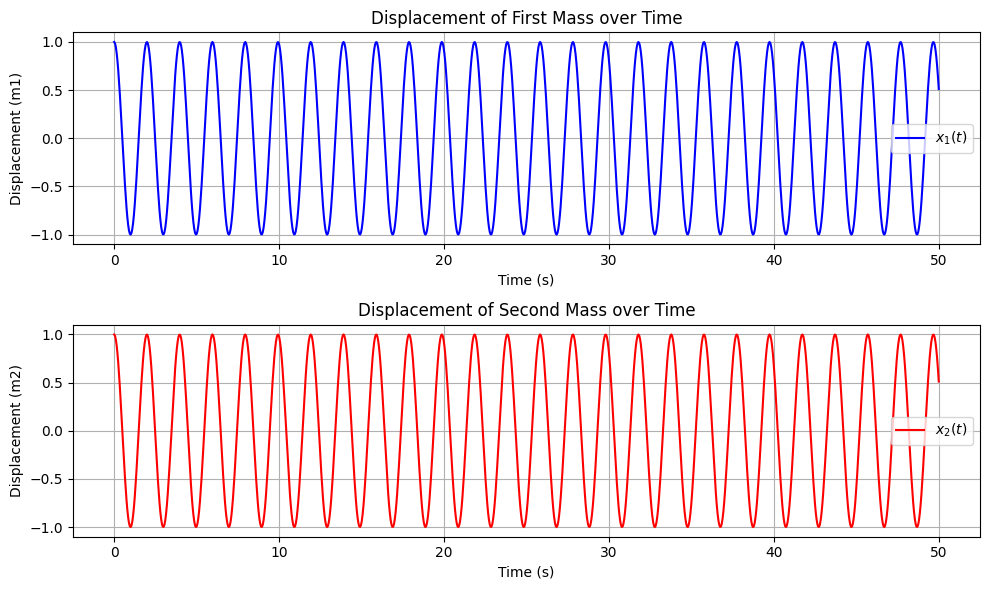

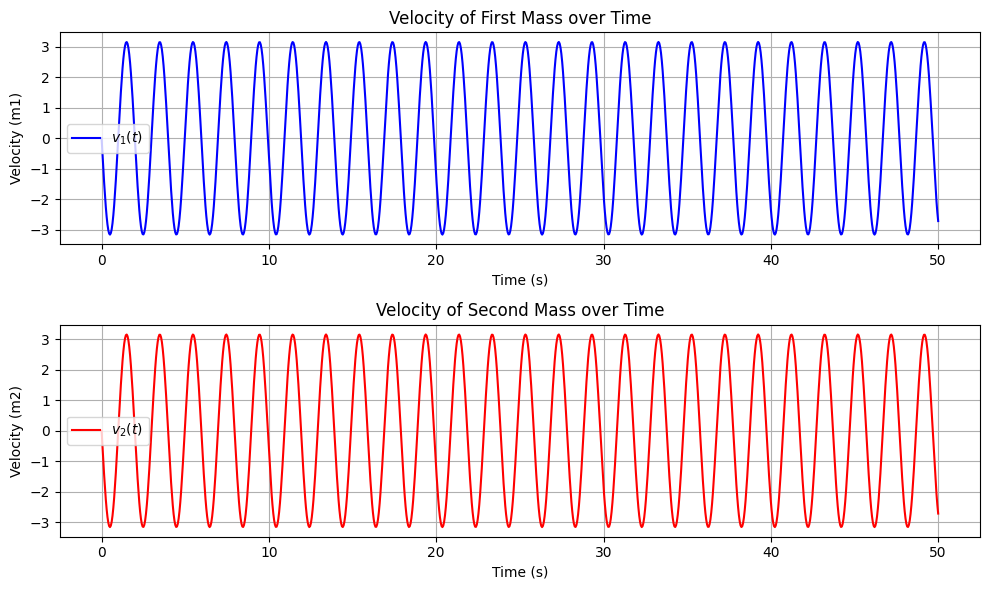

In [4]:
# We convert Sympy expressions to Numpy functions.
x1_func = sp.lambdify(t, solutions[0].rhs,'numpy')
x2_func = sp.lambdify(t, solutions[1].rhs,'numpy')
v1_func = sp.lambdify(t, solutions[2].rhs,'numpy')
v2_func = sp.lambdify(t, solutions[3].rhs,'numpy')

# plotting the evolution
final_time = 50 # in seconds
time = np.linspace(0, final_time, 1000)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot for x1(t)
ax1.plot(time, x1_func(time), label='$x_1(t)$', color='blue')
ax1.set_ylabel("Displacement (m1)")
ax1.set_xlabel("Time (s)")
ax1.set_title("Displacement of First Mass over Time")
ax1.legend()
ax1.grid(True)

# Plot for x2(t)
ax2.plot(time, x2_func(time), label='$x_2(t)$', color='red')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Displacement (m2)")
ax2.set_title("Displacement of Second Mass over Time")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Adjust the layout so that the plots don't overlap
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot for x1(t)
ax1.plot(time, v1_func(time), label='$v_1(t)$', color='blue')
ax1.set_ylabel("Velocity (m1)")
ax1.set_xlabel("Time (s)")
ax1.set_title("Velocity of First Mass over Time")
ax1.legend()
ax1.grid(True)

# Plot for x2(t)
ax2.plot(time, v2_func(time), label='$v_2(t)$', color='red')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m2)")
ax2.set_title("Velocity of Second Mass over Time")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Adjust the layout so that the plots don't overlap
plt.show()

**Section 3 - Quantum simulation for 4 mass system [State vector methods]**

We will explore using quantum computing methods to simulate the dynamics of the classical system using the Classiq circuit synthesizer. The methods maps the equations of motion into the hamiltonian and perform time evolution of hamiltonian based the inital values (mapped into amplitudes of the quantum styates). In this section, we will use a state vector simulator to obtain the final state and test result using classical methods.

In this example, we will use a system with 4 masses - m1,m2,m3,m4 coupled by springs of constants k11,k12,k23,k34. The first os alone coupled to the wall through a spring and the last mass is left free. The entire system is placed on a ground to restrict to one dimensional motion. The below image represents the system.

![](https://drive.google.com/uc?export=view&id=1P3UXeVbDhvKMm1_TfCgOV7q9IDBqvM-5)

**Section 3.1 - Initial state preparation.**

The first step is to map the intial position and velocities of the masses into the hilbert space. We will be using amplitude embedding approach to embed the values into the amplitudes of the quantum states.

The initial state matrix has to be in a particular way to perform the quantum evolution before embedded it into the amplitudes of the quantum states. The indepth proof and reasoning behind the formulation is explained in the original work published in 2023 by Ryan Babbush et al.

The initial state matrix is denoted as below.

$ | \psi (0) \rangle $ = $ \frac {1}{\sqrt{2E}} \begin{pmatrix}
 \sqrt{M} \dot{\vec{x}}(0) \\
 i\vec{\mu}(0)
\end{pmatrix}$

The final state matrix which will be obtained from state vector simulation will take up the below form.

$ | \psi (t) \rangle $ = $ \frac {1}{\sqrt{2E}} \begin{pmatrix}
 \sqrt{M} \dot{\vec{x}}(t) \\
 i\vec{\mu}(t)
\end{pmatrix}$

where the mass matrix
M =
$ \begin{pmatrix}
 m1 & 0 & \cdots & 0 \\
 0 & m2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
 0 & 0 & \cdots & m_N
\end{pmatrix} $

The
$ \vec{\mu}(0) $ = $ \begin{pmatrix}
\vdots \\
 \sqrt{k_{ij}} (x_i - x_j) \\
\vdots  \\
 \sqrt{k_{jj}} x_j \\
\vdots  \\
\end{pmatrix} $ where j>i.



In [5]:
# number of masses N.
N = 4
n = np.log2(N)

# mass matrix - Assuming identical
M = np.diag(np.full(N,1))
print("Mass matrix")
print(M)

#position vector
x = np.array([0.,0.,0.,1])
print("Initial Position matrix")
print(x)

#velocity vector
x_dot = np.array([0,0,0,0])
print("Initial Velocity matrix")
print(x_dot)

#spring constant matrix
def spring_constant_calculation(N,k,connection_map):
  K = np.zeros((N,N))
  K[0][0] = k
  # K[N-1][N-1] = 1 - open last mass
  for i in range(len(connection_map)):
   start = connection_map[i][0]
   end = connection_map[i][1]
   K[start][end] = k
   K[end][start] = k

  return K

# We pass the total number of mass, spring constants (assuming identical)
# and the connection map of the springs
# with respect to masses.
K = np.array(spring_constant_calculation(4,10,[[0,1],[1,2],[2,3]]))
print("Spring constant matrix")
print(K)

Mass matrix
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Initial Position matrix
[0. 0. 0. 1.]
Initial Velocity matrix
[0 0 0 0]
Spring constant matrix
[[10. 10.  0.  0.]
 [10.  0. 10.  0.]
 [ 0. 10.  0. 10.]
 [ 0.  0. 10.  0.]]


In [7]:
#y_dot vector - product of sqrt(M) and initial velocity vector
y_dot = np.matmul(np.transpose(x_dot),np.sqrt(M))
print("y_dot vector")
print(y_dot)
print("--------------------------------------------")
#mu vector
mu = []
for i in range(len(K)):
    for j in range(len(K[0])):
        if j>i:
            mu.append(np.sqrt(K[i][j])*(x[i]-x[j]))
        elif j==i:
            mu.append(np.sqrt(K[j][j])*x[j])
if len(mu)==(N*(N+1)/2):
    print("mu vector is formed correctly")
print("M = ",M)
print("x_dot = ",x_dot,"y_dot = ",y_dot, "mu = ", mu)
print("--------------------------------------------")
#Initial State
psi0 = []
E = 1
psi0 = np.concatenate([y_dot,i*np.array(mu)])/np.sqrt(2*E)
print("psi0 = ",psi0, "size_of_psi0 = ",len(psi0))
print("--------------------------------------------")

y_dot vector
[0. 0. 0. 0.]
--------------------------------------------
mu vector is formed correctly
M =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
x_dot =  [0 0 0 0] y_dot =  [0. 0. 0. 0.] mu =  [0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -3.1622776601683795, 0.0]
--------------------------------------------
psi0 =  [ 0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -6.70820393  0.        ] size_of_psi0 =  14
--------------------------------------------


The main thing to note here is the dimensionality. The initial and final state vector of the form

$ | \psi (t) \rangle $ = $ \frac {1}{\sqrt{2E}} \begin{pmatrix}
 \sqrt{M} \dot{\vec{x}}(t) \\
 i\vec{\mu}(t)
\end{pmatrix}$

where the dimension is of N + M.
The N value denotes the number of masses and the M := $ \frac {N(N+1)}{2} $. So in this case N = 4 and M = 10 and so N+M = 14.

This is not of size of $ 2^n $ and so we pad it to zeros to make the initial state in powers of two. Use this new initial state, we can compute the number of qubits required to encode the initial state.

In [8]:
#making dimesion of q suitable with padding zeros
dim = int(N+(N*(N+1)/2))
while not(dim and (not(dim & (dim - 1)))): #checking of it is a power of 2
    dim+=1

num_qubits = int(np.log2(dim))
print(num_qubits)

4


References


1.   https://medium.com/@hanneskoessl/classical-mechanics-with-sympy-coupled-spring-mass-system-f473df7502aa
2.   Wondershare EdrawMax software to diagrams

